In [58]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [59]:
# import des bibliotheques

import pandas as pd
# from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from collections import Counter
from nltk.stem.porter import PorterStemmer    
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#Importer les libriries 
import pandas as pd
import numpy as np
import re
import nltk
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud

# # sklearn
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
# import du csv

df= pd.read_csv('QueryResults.csv')

df.head(5)

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><datetime>
3,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
4,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...


In [61]:
df.shape

(46497, 3)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46497 entries, 0 to 46496
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   46497 non-null  object
 1   Body    46497 non-null  object
 2   Tags    46388 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [63]:
df.dtypes

Title    object
Body     object
Tags     object
dtype: object

In [64]:

df.isnull().sum()

Title      0
Body       0
Tags     109
dtype: int64

In [65]:
len(df['Tags'].unique())

34789

# datacleaning

Le datacleaning en nlp comprends :

    - Mettre le texte en minuscule
    - Supprimer les liens https
    - Supprimer les ponctuations
    - Supprimer les chiffres (sauf si les chiffres ont un intérêt)
    - Tokenisation (garder la racine des mots)
    - Supprimer les stop word 

In [66]:
def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les liens
    text = re.sub(r'https?\S+', ' ', text)
    # Supprimer les ponctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def preprocess_dataset(dataset, text_columns):
    for col in text_columns:
        dataset[col] = dataset[col].apply(preprocess_text)
    return dataset

def apply_stemming_lemmatization(tokens):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed = [ps.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return lemmatized

def preprocess_and_transform(dataset):
    # Appliquer le prétraitement
    text_columns = ['Title', 'Body']
    dataset = preprocess_dataset(dataset, text_columns)
    # Appliquer le stemming et lemmatization
    for col in text_columns:
        dataset[col] = dataset[col].apply(apply_stemming_lemmatization)
    return dataset



In [67]:
preprocessed_df = preprocess_and_transform(df)
print(preprocessed_df)

                                                   Title  \
0                             [convert, decim, doubl, c]   
1      [width, collaps, percentag, width, child, elem...   
2      [calcul, someon, age, base, datetim, type, bir...   
3                                 [calcul, rel, time, c]   
4                              [determin, user, timezon]   
...                                                  ...   
46492                   [flash, load, twice, workaround]   
46493    [creat, python, methodssignatur, content, code]   
46494                           [etag, v, header, expir]   
46495  [determin, longest, similar, portion, sever, s...   
46496                      [valid, binari, search, tree]   

                                                    Body  \
0      [pi, want, assign, decim, variabl, quottransqu...   
1      [pi, absolut, posit, codedivcod, contain, seve...   
2      [pgiven, codedatetimecod, repres, person, birt...   
3      [pgiven, specif, codedatetimecod

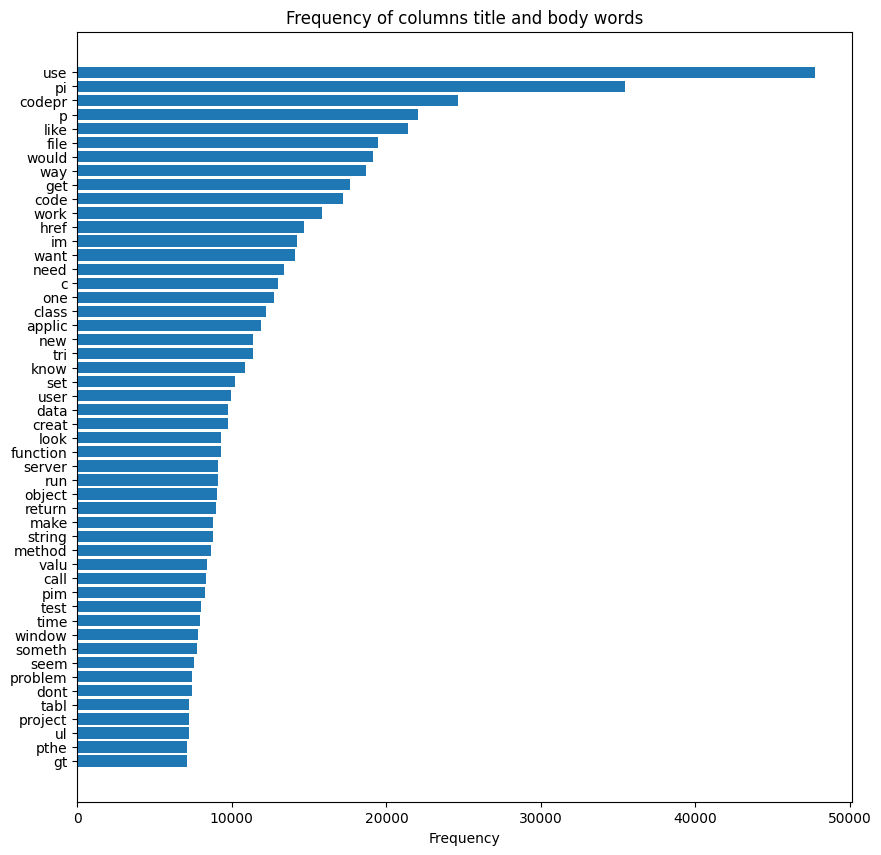

In [68]:
# Calculer les fréquences des mots pour chaque colonne
def get_word_frequencies(column_data):
    all_words = [word for tokens in column_data for word in tokens]
    word_freq = Counter(all_words)
    return word_freq

title_word_freq = get_word_frequencies(preprocessed_df['Title'])
body_word_freq = get_word_frequencies(preprocessed_df['Body'])

# Combiner les fréquences des deux colonnes
combined_word_freq = title_word_freq + body_word_freq

# Obtenir les 50 mots les plus fréquents
most_common_words = combined_word_freq.most_common(50)
words, counts = zip(*most_common_words)

# Visualiser les fréquences des mots les plus courants
plt.figure(figsize=(10, 10))
plt.barh(range(len(words)), counts, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Frequency of columns title and body words')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir le mot le plus fréquent en haut
plt.show()

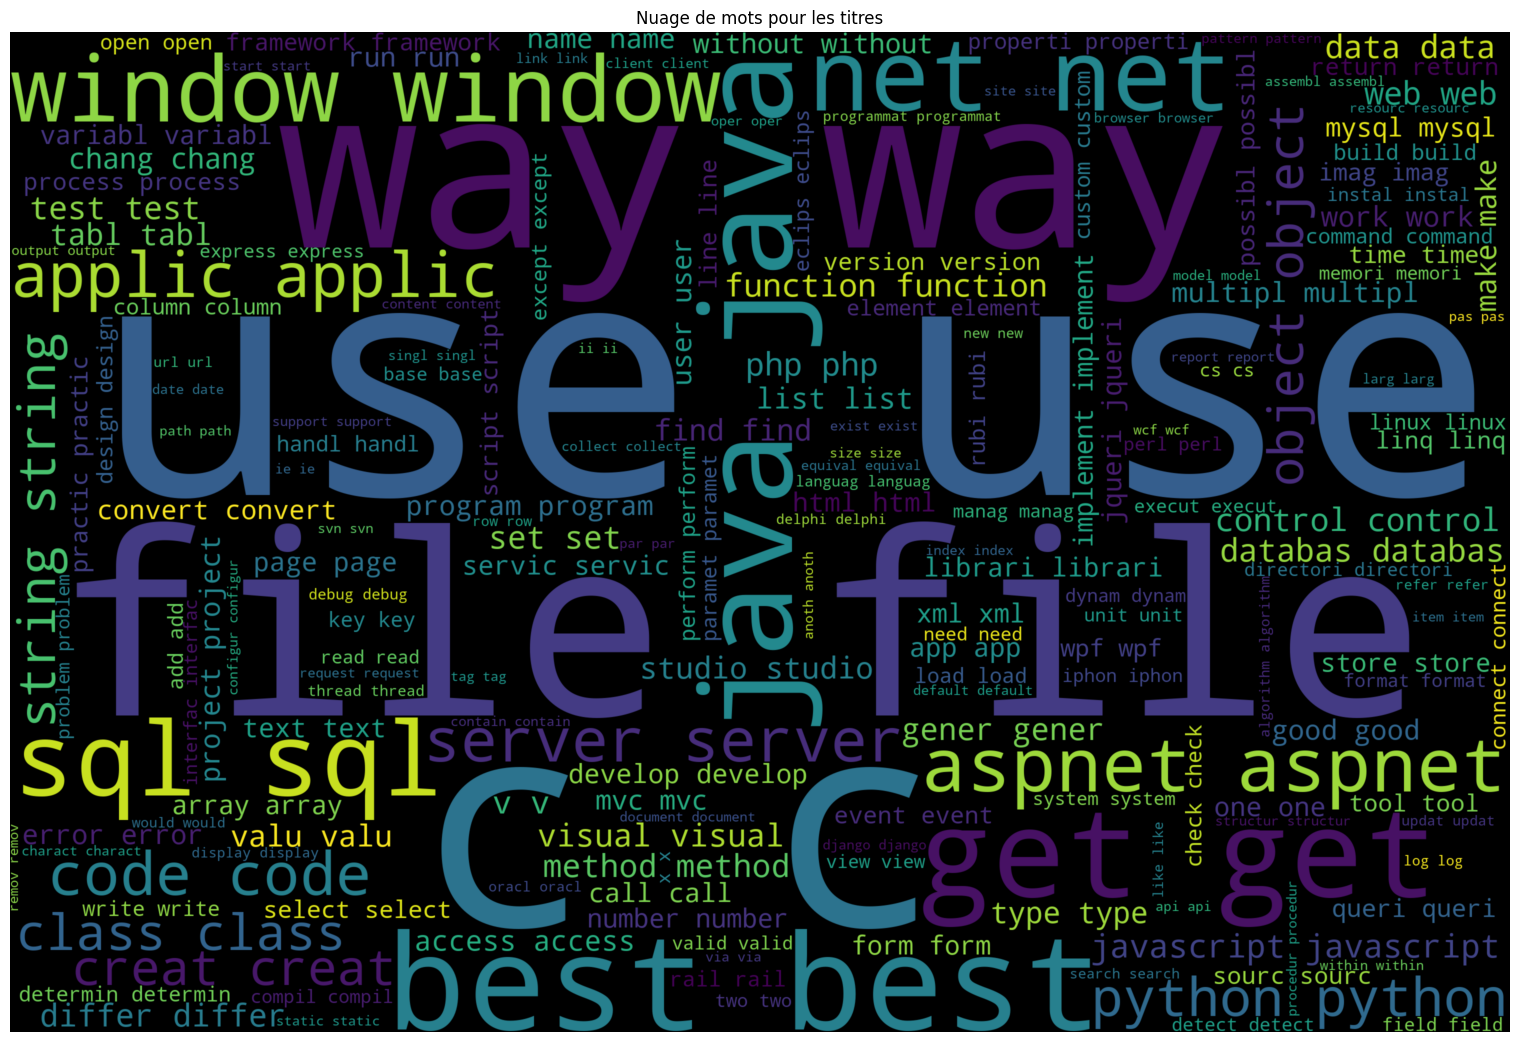

In [69]:
# création de nuage de mots pour la colonne title
title_word_freq = get_word_frequencies(preprocessed_df['Title'])

# Convertir les fréquences de mots en une seule chaîne de texte
text = ' '.join([word for word, freq in title_word_freq.items() for _ in range(freq)])

# Créer et afficher le nuage de mots
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=set(stopwords.words('english'))
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres')
plt.show()

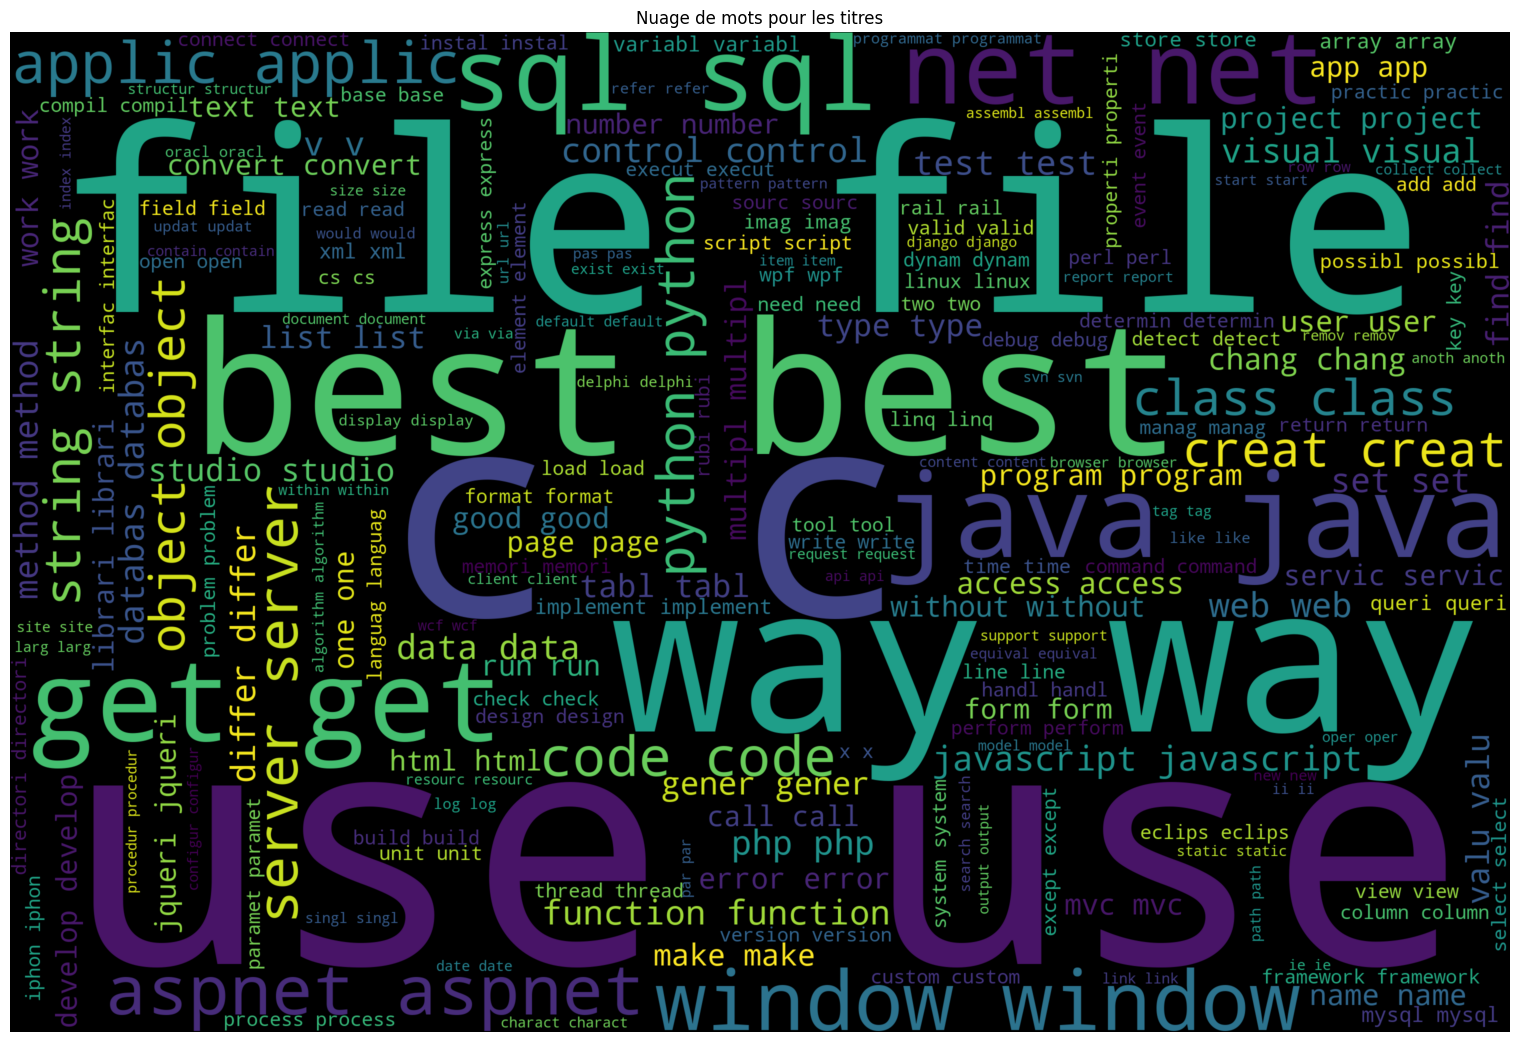

In [70]:
# création de nuage de mots pour la colonne body

body_word_freq = get_word_frequencies(preprocessed_df['Title'])

# Convertir les fréquences de mots en une seule chaîne de texte
text = ' '.join([word for word, freq in body_word_freq.items() for _ in range(freq)])

# Créer et afficher le nuage de mots
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=set(stopwords.words('english'))
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres')
plt.show()